# TIC domicílios analysis

The research TIC domicílios (Information and Communications Technology household) have as its main objective measure the ownership and usage of information and communication technologies among the resident population in Brazil with ages 10 or more.

The dataset used was built in 2015 and last published in 2017. It is available at http://cetic.br/pesquisa/domicilios/microdados along with the variables dictionary.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Inline print of plots on Jupyter notebooks
%matplotlib inline

# Set Seaborn default style to plots
sns.set()

## Load dataset

In [3]:
# Load the anonymized microdata
tic_households_2015 = pd.read_csv('data/tic_domicilios_2015/ticdom_2015_domicilios_base_de_microdados_v1.0.csv', sep=';')

## Inspect dataset

In [4]:
# Show its contents
tic_households_2015.head()

QUEST  ESTRATO  UPA  id_domicilio  cod_regiao  classe_cb2015  \
0      1        1    1             1           1              3   
1      3        1    1             3           1              4   
2      4        1    1             4           1              3   
3      7        1    1             7           1              4   
4      8        1    1             8           1              4   

   classe_cb2008  area  RENDA_FAMILIAR  tv        ...         A5_H  A5_I  \
0              3     1               2   1        ...            0     0   
1              3     1               2   1        ...            1     1   
2              3     1               2   1        ...            1     1   
3              4     1               2   1        ...            0     0   
4              4     1               2   1        ...            0     0   

   A5_outro  A6  A7  A7A  A7B  A8  A9              PESO  
0         0  99  99   99   99  99  99  6761,72359691356  
1         0  99  99   99   99  99  99  5964,69644419449  
2         0  99  99   99   99  99  99  6761,72359691356  
3         0  99  99   99   99  99  99  5335,42880657253  
4         0  99  99   99   99  99  99  3686,94418092187  

[5 rows x 55 columns]

In [5]:
# Describe its properties
tic_households_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23465 entries, 0 to 23464
Data columns (total 55 columns):
QUEST                23465 non-null int64
ESTRATO              23465 non-null int64
UPA                  23465 non-null int64
id_domicilio         23465 non-null int64
cod_regiao           23465 non-null int64
classe_cb2015        23465 non-null int64
classe_cb2008        23465 non-null int64
area                 23465 non-null int64
RENDA_FAMILIAR       23465 non-null int64
tv                   23465 non-null int64
radio                23465 non-null int64
banheiro             23465 non-null int64
automovel            23465 non-null int64
empregada            23465 non-null int64
lava_roupa           23465 non-null int64
geladeira            23465 non-null int64
freezer              23465 non-null int64
lava_louca           23465 non-null int64
dvd                  23465 non-null int64
videocassete         23465 non-null int64
micro_ondas          23465 non-null int64
motocicle

In [6]:
# Describe its main statistics
tic_households_2015.describe()

QUEST       ESTRATO           UPA  id_domicilio    cod_regiao  \
count  23465.000000  23465.000000  23465.000000  23465.000000  23465.000000   
mean   16230.907181     44.290688    297.840188  16230.907181      2.837290   
std     9821.236031     26.658384    259.225931   9821.236031      1.087832   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%     7685.000000     28.000000    119.000000   7685.000000      2.000000   
50%    15527.000000     36.000000    209.000000  15527.000000      3.000000   
75%    25209.000000     62.000000    392.000000  25209.000000      3.000000   
max    33209.000000    104.000000    996.000000  33209.000000      5.000000   

       classe_cb2015  classe_cb2008          area  RENDA_FAMILIAR  \
count   23465.000000   23465.000000  23465.000000    23465.000000   
mean        3.168932       3.040955      1.090816        9.766716   
std         0.770070       0.724482      0.287354       25.362250   
min         1.000000       1.000000      1.000000        1.000000   
25%         3.000000       3.000000      1.000000        2.000000   
50%         3.000000       3.000000      1.000000        2.000000   
75%         4.000000       4.000000      1.000000        4.000000   
max         4.000000       4.000000      2.000000       98.000000   

                 tv      ...               A5_G          A5_H          A5_I  \
count  23465.000000      ...       23465.000000  23465.000000  23465.000000   
mean       1.513488      ...          47.242915     46.985510     47.140422   
std        0.789085      ...          49.262793     49.172295     49.190207   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        1.000000      ...           0.000000      0.000000      0.000000   
50%        1.000000      ...           1.000000      1.000000      1.000000   
75%        2.000000      ...          99.000000     99.000000     99.000000   
max        4.000000      ...          99.000000     99.000000     99.000000   

           A5_outro           A6            A7           A7A           A7B  \
count  23465.000000  23465.00000  23465.000000  23465.000000  23465.000000   
mean      45.340592     54.41466     59.643554     54.896356     54.182144   
std       49.319128     48.89737     46.792910     48.846997     49.197093   
min        0.000000      0.00000      1.000000      0.000000      0.000000   
25%        0.000000      1.00000      4.000000      1.000000      0.000000   
50%        0.000000     99.00000     99.000000     99.000000     99.000000   
75%       99.000000     99.00000     99.000000     99.000000     99.000000   
max       99.000000     99.00000     99.000000     99.000000     99.000000   

                 A8            A9  
count  23465.000000  23465.000000  
mean      75.200511     60.943789  
std       40.682530     45.252442  
min        1.000000      1.000000  
25%        9.000000      7.000000  
50%       99.000000     99.000000  
75%       99.000000     99.000000  
max       99.000000     99.000000  

[8 rows x 54 columns]

In [7]:
# Drop unnecessary variables
tic_households_2015 = tic_households_2015.drop(['QUEST', 'ESTRATO', 'UPA', 'id_domicilio', 'PESO'], axis=1)

In [8]:
# Describe its columns
tic_households_2015.columns

Index(['cod_regiao', 'classe_cb2015', 'classe_cb2008', 'area',
       'RENDA_FAMILIAR', 'tv', 'radio', 'banheiro', 'automovel', 'empregada',
       'lava_roupa', 'geladeira', 'freezer', 'lava_louca', 'dvd',
       'videocassete', 'micro_ondas', 'motocicleta', 'secadora',
       'telefone_fixo', 'videogame', 'tv_assinatura', 'antena_parabolica',
       'energia_eletrica', 'agua', 'rua', 'grau_instrucao', 'A1_A', 'A1_B',
       'A1_C', 'a2_qtd_desk', 'a2_qtd_note', 'a2_qtd_tab', 'A4', 'A5_A',
       'A5_B', 'A5_C', 'A5_D', 'A5_E', 'A5_F', 'A5_G', 'A5_H', 'A5_I',
       'A5_outro', 'A6', 'A7', 'A7A', 'A7B', 'A8', 'A9'],
      dtype='object')

## Exploratory analysis

In [9]:
# Compare the mean, the median and the max for average household income

'''
Since the variables are encoded, it is necessary to look their meanings in a dictionary. This dictionary is
available in the same page at the dataset. The values for household income (RENDA FAMILIAR), in brazilian reais, are:

1 = "Up to R$ 788,00"
2 = "From R$ 788,01 to R$ 1.576,00"
3 = "From R$ 1.576,01 to R$ 2.364,00"
4 = "From R$ 2.364,01 to R$ 3.940,00"
5 = "From R$ 3.940,01 to R$ 7.880,00"
6 = "From R$ 7.880,01 to R$ 15.760,00"
7 = "From R$ 15.760,01 to R$ 23.640,00"
8 = "More than R$ 23.640,00"
97 = "Don't know"
98 = "Didn't answered"
'''

print('Mean is {0}'.format(tic_households_2015['RENDA_FAMILIAR'].mean()))
print('Median is {0}'.format(tic_households_2015['RENDA_FAMILIAR'].median()))
print('Max is {0}'.format(tic_households_2015['RENDA_FAMILIAR'].max()))

Mean is 9.766716386106967
Median is 2.0
Max is 98


In [10]:
# Those who didn't answered and don't know are skewing the data to the right but the median is unnafected. They can be removed for more accurate results

'''
Deleting results can be dangerous. Those who didn't answered or don't know should be included in the research somehow
otherwise the data may not be accurate enough to be used for model training. This will be done just to have an
idea of the average household income for this dataset. 
'''
household_income = tic_households_2015['RENDA_FAMILIAR']
skewed_household_income = household_income.loc[household_income.isin([97, 98])]

print('Proportion of skewed results: {0}'.format((len(skewed_household_income) / len(household_income)) * 100))

# 7.7% of respondents aren't being included in this analysis

household_income = household_income[~household_income.isin(skewed_household_income)]

Proportion of skewed results: 7.700831024930747


In [11]:
# Print mean, median and max to see if results change. Since the median is unnafected by outliers it had no changes

# The average household income is something between R$ 788,01 and R$ 1.576,00

print('Mean is {0}'.format(household_income.mean()))
print('Median is {0}'.format(household_income.median()))
print('Max is {0}'.format(household_income.max()))

Mean is 2.4500415550835717
Median is 2.0
Max is 8


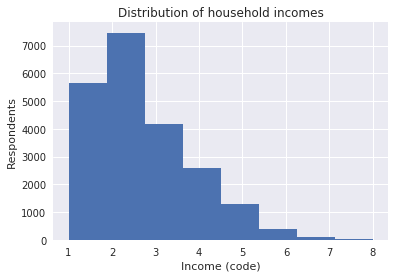

In [12]:
# Plot the distribution of household incomes

plt.hist(household_income, bins=8)
plt.title('Distribution of household incomes')
plt.xlabel('Income (code)')
plt.ylabel('Respondents')
plt.show()

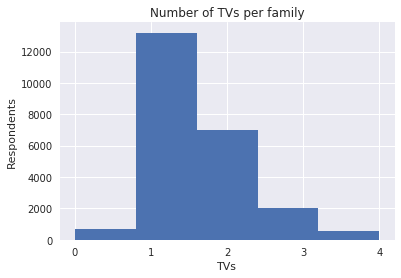

In [13]:
# Plot the distribution of TVs per family
plt.hist(tic_households_2015['tv'], bins=5)
plt.title('Number of TVs per family')
plt.xlabel('TVs')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

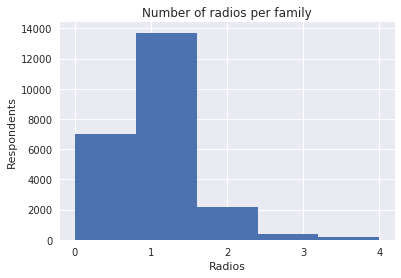

In [14]:
# Plot the number of radios per family
plt.hist(tic_households_2015['radio'], bins=5)
plt.title('Number of radios per family')
plt.xlabel('Radios')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

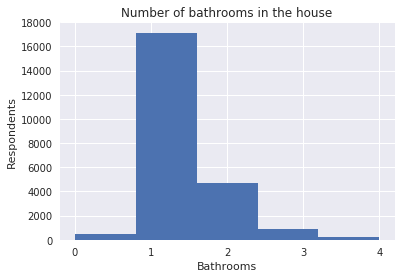

In [15]:
# Plot the number of bathrooms in the house
plt.hist(tic_households_2015['banheiro'], bins=5)
plt.title('Number of bathrooms in the house')
plt.xlabel('Bathrooms')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

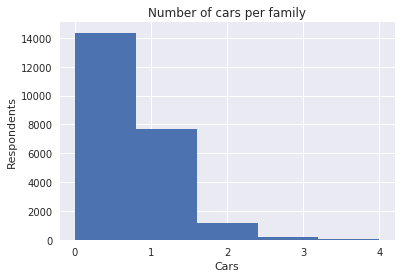

In [16]:
# Plot the number of cars per family
plt.hist(tic_households_2015['automovel'], bins=5)
plt.title('Number of cars per family')
plt.xlabel('Cars')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

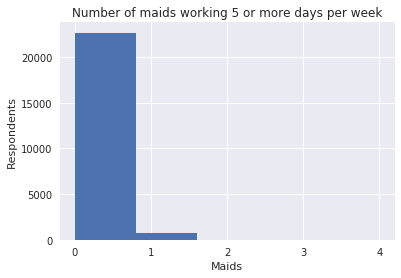

In [17]:
# Number of maids who work 5 or more days per week inside a family's house
plt.hist(tic_households_2015['empregada'], bins=5)
plt.title('Number of maids working 5 or more days per week')
plt.xlabel('Maids')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

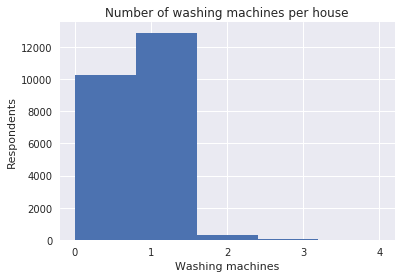

In [18]:
# Number of washing machines per house
plt.hist(tic_households_2015['lava_roupa'], bins=5)
plt.title('Number of washing machines per house')
plt.xlabel('Washing machines')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

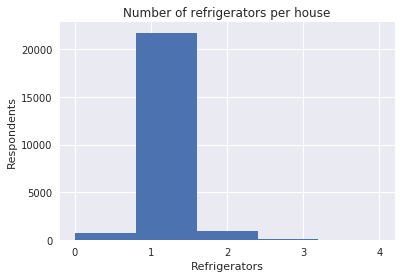

In [19]:
# Number of refrigerators per house
plt.hist(tic_households_2015['geladeira'], bins=5)
plt.title('Number of refrigerators per house')
plt.xlabel('Refrigerators')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

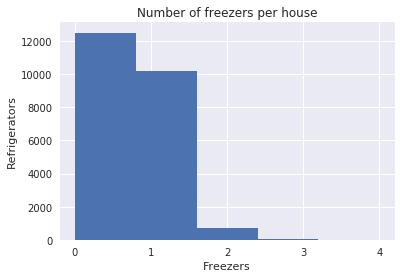

In [20]:
# Number of freezers per house
plt.hist(tic_households_2015['freezer'], bins=5)
plt.title('Number of freezers per house')
plt.xlabel('Freezers')
plt.ylabel('Refrigerators')
plt.xticks(np.arange(5))
plt.show()

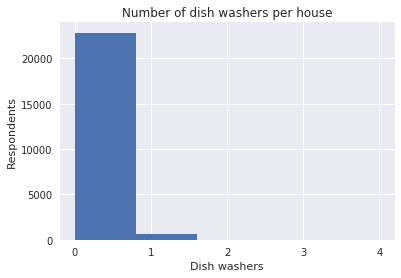

In [21]:
# Number of dish washers per house
plt.hist(tic_households_2015['lava_louca'], bins=5)
plt.title('Number of dish washers per house')
plt.xlabel('Dish washers')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

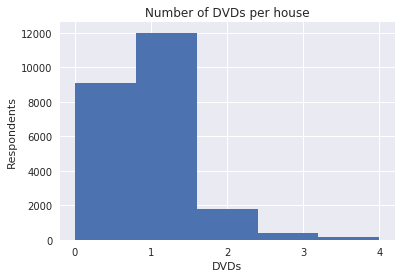

In [22]:
# Number of DVDs per house
plt.hist(tic_households_2015['dvd'], bins=5)
plt.title('Number of DVDs per house')
plt.xlabel('DVDs')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

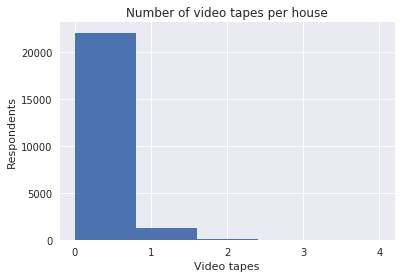

In [23]:
# Number of video tapes per house
plt.hist(tic_households_2015['videocassete'], bins=5)
plt.title('Number of video tapes per house')
plt.xlabel('Video tapes')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

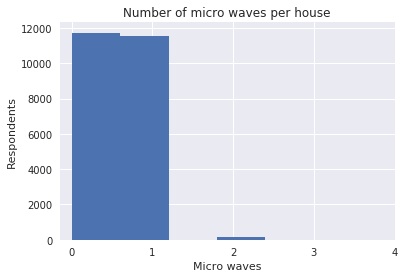

In [24]:
# Number of micro waves per house
plt.hist(tic_households_2015['micro_ondas'], bins=5)
plt.title('Number of micro waves per house')
plt.xlabel('Micro waves')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

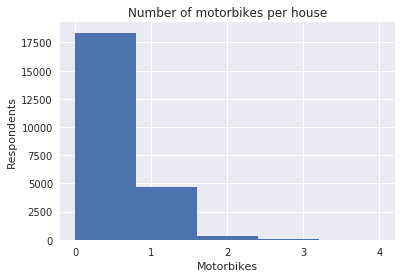

In [25]:
# Number of motorbikes per house
plt.hist(tic_households_2015['motocicleta'], bins=5)
plt.title('Number of motorbikes per house')
plt.xlabel('Motorbikes')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

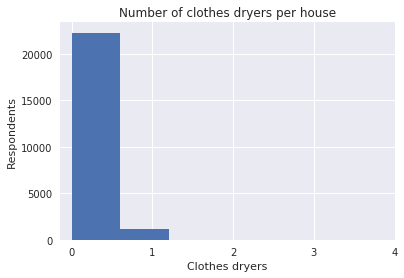

In [26]:
# Number of clothes dryers per house
plt.hist(tic_households_2015['secadora'], bins=5)
plt.title('Number of clothes dryers per house')
plt.xlabel('Clothes dryers')
plt.ylabel('Respondents')
plt.xticks(np.arange(5))
plt.show()

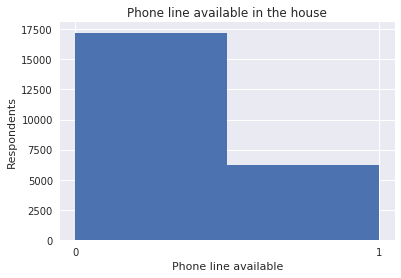

In [27]:
# Have phone line in the house?
plt.hist(tic_households_2015['telefone_fixo'], bins=2)
plt.title('Phone line available in the house')
plt.xlabel('Phone line available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

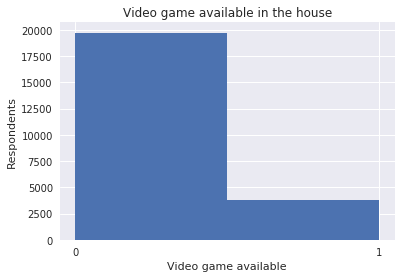

In [28]:
# Have video game in the house?
plt.hist(tic_households_2015['videogame'], bins=2)
plt.title('Video game available in the house')
plt.xlabel('Video game available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

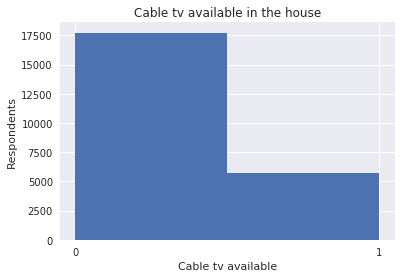

In [29]:
# Have cable tv available?
plt.hist(tic_households_2015['tv_assinatura'], bins=2)
plt.title('Cable tv available in the house')
plt.xlabel('Cable tv available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

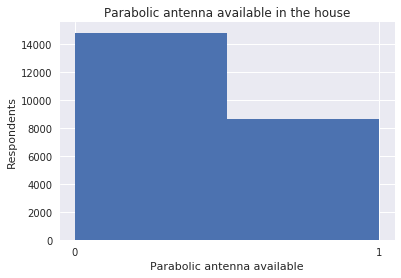

In [30]:
# Have parabolic antenna available in the house?
plt.hist(tic_households_2015['antena_parabolica'], bins=2)
plt.title('Parabolic antenna available in the house')
plt.xlabel('Parabolic antenna available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

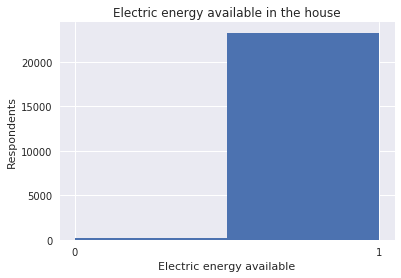

In [31]:
# Have electric energy in the house
plt.hist(tic_households_2015['energia_eletrica'], bins=2)
plt.title('Electric energy available in the house')
plt.xlabel('Electric energy available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

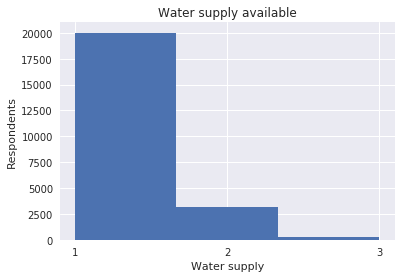

In [32]:
# Water supply available

'''
The available options are:
1 - General network distribution
2 - Well or source
3 - Other
'''
plt.hist(tic_households_2015['agua'], bins=3)
plt.title('Water supply available')
plt.xlabel('Water supply')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,4))
plt.show()

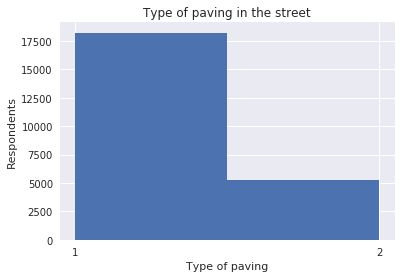

In [33]:
# Type of paving in the street of your house

'''
The available options are:
1 - Paved
2 - Sand
'''
plt.hist(tic_households_2015['rua'], bins=2)
plt.title('Type of paving in the street')
plt.xlabel('Type of paving')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,3))
plt.show()

Number of outliers: 222


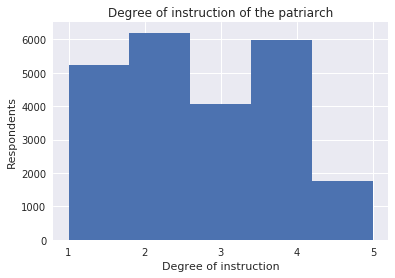

In [34]:
# Degree of instruction of the patriarch of the house

degree_skewed = tic_households_2015.loc[tic_households_2015['grau_instrucao'].isin([97, 98, 99])]

# 222 registers lie between 97 and 99 (don't know, didn't answer or do not apply options)
print('Number of outliers: {0}'.format(len(degree_skewed)))

'''
The available options are:
1 - Iliterate / up to third elementary grade
2 - fourth to seventh elementary grade
3 - elementary complete / high school incomplete
4 - high school complete / college incomplete
5 - college complete
'''
plt.hist(tic_households_2015['grau_instrucao'].loc[~tic_households_2015['grau_instrucao'].isin([97, 98, 99])], bins=5)
plt.title('Degree of instruction of the patriarch')
plt.xlabel('Degree of instruction')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,6))
plt.show()

Number of outliers: 27


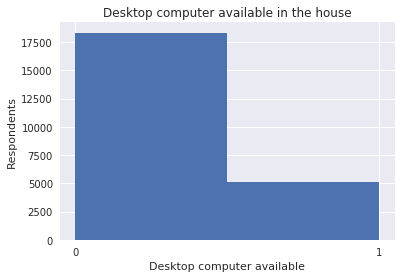

In [35]:
# Desktop computer available in the house

desktop_computers_skewed = tic_households_2015['A1_A'].loc[tic_households_2015['A1_A'].isin([97, 98, 99])]

# 27 outliers

print('Number of outliers: {0}'.format(len(desktop_computers_skewed)))

plt.hist(tic_households_2015['A1_A'].loc[~tic_households_2015['A1_A'].isin([97, 98, 99])], bins=2)
plt.title('Desktop computer available in the house')
plt.xlabel('Desktop computer available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

Number of outliers: 34


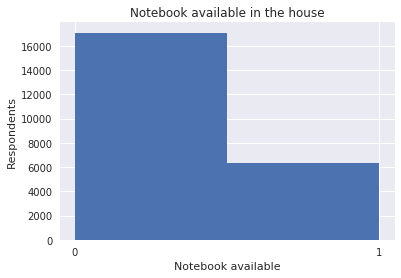

In [36]:
# Notebook available

notebook_computers_skewed = tic_households_2015['A1_B'].loc[tic_households_2015['A1_B'].isin([97, 98, 99])]

# 34 outliers

print('Number of outliers: {0}'.format(len(notebook_computers_skewed)))

plt.hist(tic_households_2015['A1_B'].loc[~tic_households_2015['A1_B'].isin([97, 98, 99])], bins=2)
plt.title('Notebook available in the house')
plt.xlabel('Notebook available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

Number of outliers: 36


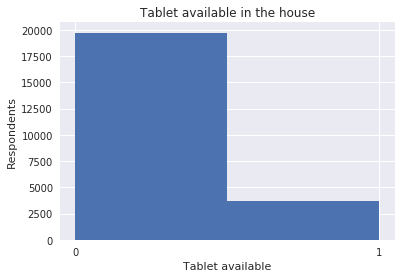

In [37]:
# Number of tablets available

tablet_skewed = tic_households_2015['A1_C'].loc[tic_households_2015['A1_C'].isin([97, 98, 99])]

# 36 outliers

print('Number of outliers: {0}'.format(len(tablet_skewed)))

plt.hist(tic_households_2015['A1_C'].loc[~tic_households_2015['A1_C'].isin([97, 98, 99])], bins=2)
plt.title('Tablet available in the house')
plt.xlabel('Tablet available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

Don't apply: 18366


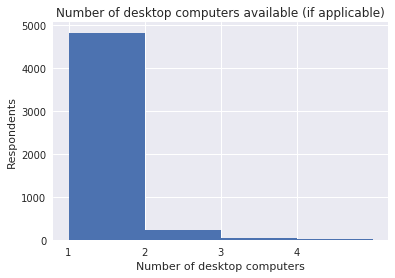

In [38]:
# Number of desktop computers available (for those who have)
print('Don\'t apply: {0}'.format(len(tic_households_2015['a2_qtd_desk'].loc[tic_households_2015['a2_qtd_desk'] == 999999999])))

desktop_computers = tic_households_2015['a2_qtd_desk'].loc[tic_households_2015['a2_qtd_desk'] != 999999999]

plt.hist(desktop_computers, bins=4)
plt.title('Number of desktop computers available (if applicable)')
plt.xlabel('Number of desktop computers')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,5))
plt.show()

Don't apply: 17128


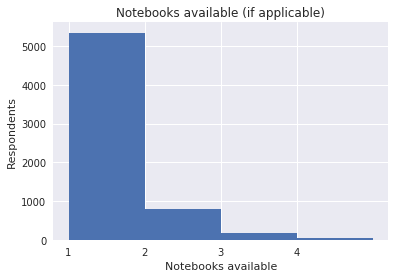

In [39]:
# Number of notebooks available (if applicable)
print('Don\'t apply: {0}'.format(len(tic_households_2015['a2_qtd_note'].loc[tic_households_2015['a2_qtd_note'] == 999999999])))

notebook_computers = tic_households_2015['a2_qtd_note'].loc[tic_households_2015['a2_qtd_note'] != 999999999]

plt.hist(notebook_computers, bins=4)
plt.title('Notebooks available (if applicable)')
plt.xlabel('Notebooks available')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,5))
plt.show()

Don't apply: 19751


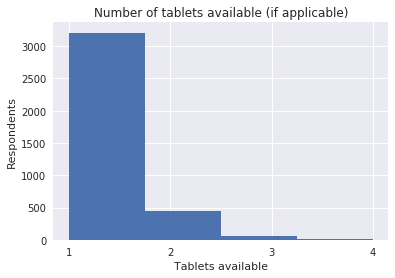

In [40]:
# Number of tablets available (if applicable)
print('Don\'t apply: {0}'.format(len(tic_households_2015['a2_qtd_tab'].loc[tic_households_2015['a2_qtd_tab'] == 999999999])))

tablet_devices = tic_households_2015['a2_qtd_tab'].loc[tic_households_2015['a2_qtd_tab'] != 999999999]

plt.hist(tablet_devices, bins=4)
plt.title('Number of tablets available (if applicable)')
plt.xlabel('Tablets available')
plt.ylabel('Respondents')
plt.xticks(np.arange(1,5))
plt.show()

Don't know or didn't answered: 47


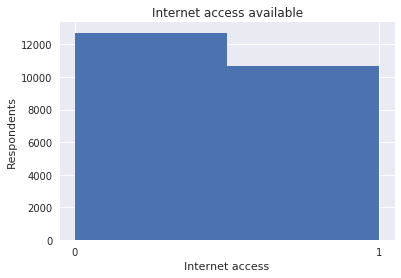

In [41]:
# Internet access available?

print('Don\'t know or didn\'t answered: {0}'.format(len(tic_households_2015['A4'].loc[tic_households_2015['A4'].isin([97, 98, 99])])))

plt.hist(tic_households_2015['A4'].loc[~tic_households_2015['A4'].isin([97, 98, 99])], bins=2)
plt.title('Internet access available')
plt.xlabel('Internet access')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

In [64]:
# Build a dataframe with reasons why some of the respondents have no internet

'''
The next columns on the dataset are about the reasons why most of the respondents don't have internet. Each column
is a possible reason and the values are encoded in 0 or 1, meaning no and yes respectively. The numbers 97, 98 and
99 are those who don't know, didn't answer and don't apply respectively. The reasons are:

A - The family don't have a computer
B - The family don't need
C - It doesn't interest the family
D - The family use the internet somewhere else
E - The family thinks it is too expensive
F - The family don't know how to use the internet
G - There is no internet connection available at their address
H - The family is worried with privacy and security issues
I - The family avoid contact with dangerous content
outro - Other reasons for not having internet
'''
no_internet_reasons = tic_households_2015[['A5_A', 'A5_B', 'A5_C', 'A5_D', 'A5_E', 'A5_F', 'A5_G', 'A5_H', 'A5_I', 'A5_outro']]
no_internet_reasons.head()

A5_A  A5_B  A5_C  A5_D  A5_E  A5_F  A5_G  A5_H  A5_I  A5_outro
0     1     0     1     0     0     1     0     0     0         0
1     1     1     0     0     1     0    97     1     1         0
2     1     1     1     1     1     1     1     1     1         0
3     0     0     0     1     1     0     0     0     0         0
4     1     1     0     0     1     0     0     0     0         0

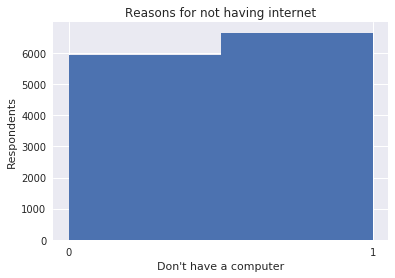

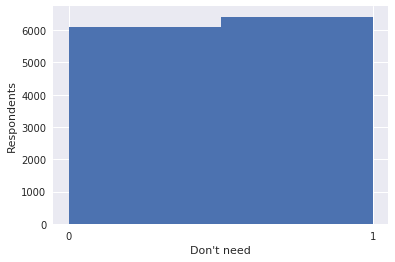

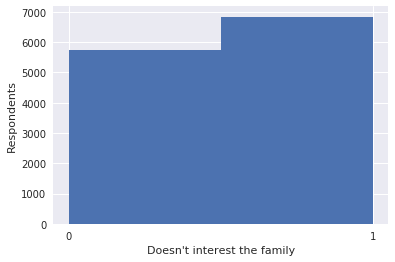

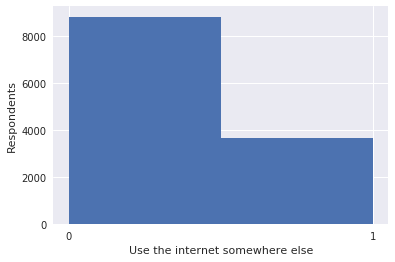

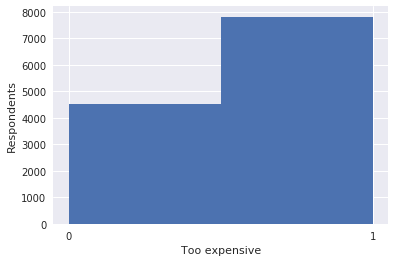

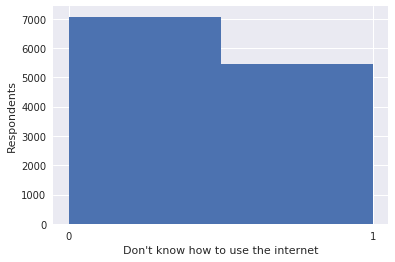

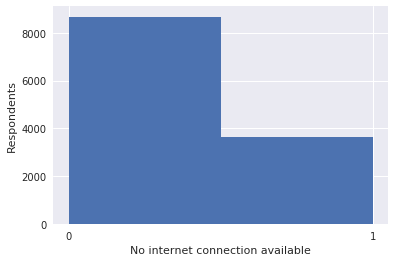

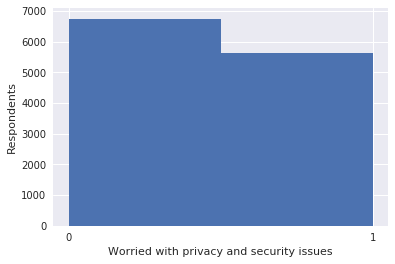

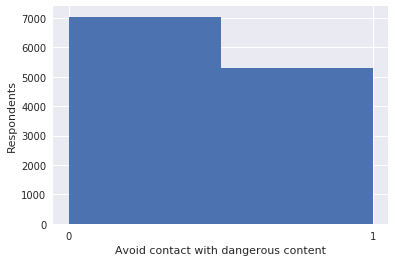

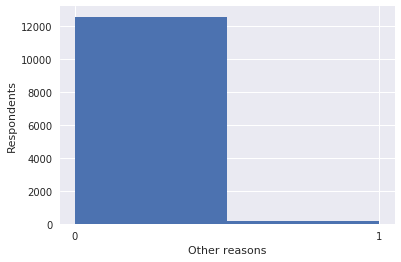

In [159]:
# Plot the reasons for not having internet (this code is very repetitive and should be encapsulated into a function)
reason_a = no_internet_reasons['A5_A'].loc[~no_internet_reasons['A5_A'].isin([97, 98, 99])]
reason_b = no_internet_reasons['A5_B'].loc[~no_internet_reasons['A5_B'].isin([97, 98, 99])]
reason_c = no_internet_reasons['A5_C'].loc[~no_internet_reasons['A5_C'].isin([97, 98, 99])]
reason_d = no_internet_reasons['A5_D'].loc[~no_internet_reasons['A5_D'].isin([97, 98, 99])]
reason_e = no_internet_reasons['A5_E'].loc[~no_internet_reasons['A5_E'].isin([97, 98, 99])]
reason_f = no_internet_reasons['A5_F'].loc[~no_internet_reasons['A5_F'].isin([97, 98, 99])]
reason_g = no_internet_reasons['A5_G'].loc[~no_internet_reasons['A5_G'].isin([97, 98, 99])]
reason_h = no_internet_reasons['A5_H'].loc[~no_internet_reasons['A5_H'].isin([97, 98, 99])]
reason_i = no_internet_reasons['A5_I'].loc[~no_internet_reasons['A5_I'].isin([97, 98, 99])]
reason_other = no_internet_reasons['A5_outro'].loc[~no_internet_reasons['A5_outro'].isin([97, 98, 99])]

plt.title('Reasons for not having internet')
plt.hist(reason_a, bins=2)
plt.xlabel('Don\'t have a computer')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_b, bins=2)
plt.xlabel('Don\'t need')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_c, bins=2)
plt.xlabel('Doesn\'t interest the family')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_d, bins=2)
plt.xlabel('Use the internet somewhere else')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_e, bins=2)
plt.xlabel('Too expensive')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_f, bins=2)
plt.xlabel('Don\'t know how to use the internet')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_g, bins=2)
plt.xlabel('No internet connection available')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_h, bins=2)
plt.xlabel('Worried with privacy and security issues')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_i, bins=2)
plt.xlabel('Avoid contact with dangerous content')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()

plt.hist(reason_other, bins=2)
plt.xlabel('Other reasons')
plt.ylabel('Respondents')
plt.xticks(np.arange(2))
plt.show()